In [1]:
#
# Árvore de Decisão - dataset: Black-Friday
# author: Irving Lucas (irving.lucas@gmail.com)
# OBS:
# coloque o dataset no diretório raiz desse código e modifique o nome do arquivo xlsx na linha 9
# manter apenas os imports necessários para essa parte do código
#

import os
import time as t
import pandas as pd

diretorio_dataset = os.getcwd()
diretorio_dataset +=r"\black-friday.xlsx"
print("Diretorio do data-set: " + diretorio_dataset)
inicio = t.time()
data_frame = pd.read_excel(diretorio_dataset)
fim = t.time()
tempo = fim-inicio
print("dataset carregado em: %.2f minutos" %(tempo/60))

Diretorio do data-set: C:\Users\irvin\Projetos\machine-learning\DECISION TREE\black-friday.xlsx
dataset carregado em: 2.14 minutos


In [2]:
len(data_frame.User_ID.unique())

5891

In [3]:
import seaborn as sns
sns.heatmap(data_frame.corr(), annot=True)

In [4]:
#dataframe_treino=frame com informações necessarias para treino // dataset_classes=conjunto de classes que queremos prever

dataframe_treino = data_frame[['User_ID','Age','Gender','Occupation','City_Category','Marital_Status']]
#dataframe_classes = data_frame['Age']

#dataframe_treino.head()

#dataframe_treino.drop_duplicates()

In [5]:
dataframe_treino.head(3)

,User_ID,Age,Gender,Occupation,City_Category,Marital_Status
0,1000001,0-17,F,10,A,0
1,1000001,0-17,F,10,A,0
2,1000001,0-17,F,10,A,0


In [6]:
#dataframe_treino.sort_values(by=['User_ID'])

In [7]:
dataframe_treino = dataframe_treino.drop_duplicates(subset='User_ID', keep='first') #melhor biblioteca da vida
#dividir o dataset de treino e classes para separar uma parte para treinar de fato e outra para testar

In [8]:
dataframe_treino['User_ID'].count()

5891

In [9]:
dataframe_treino.head(3)

,User_ID,Age,Gender,Occupation,City_Category,Marital_Status
0,1000001,0-17,F,10,A,0
4,1000002,55+,M,16,C,0
5,1000003,26-35,M,15,A,0


In [10]:
#Coleta apenas a coluna de idade
dataframe_classes = dataframe_treino['Age']
dataframe_classes.unique()

#muda o dtype do objeto
#dataframe_classes = dataframe_classes.astype('category') 

#muda a representação de intervalos de idade para um código. Ex: "0-17" -> 0
#dataframe_classes = dataframe_classes.cat.codes

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
#dataframe_treino
#dataframe_classes.unique()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#dividir o dataset de treino e classes para separar uma parte para treinar de fato e outra para testar
x_train, x_test, y_train, y_test = train_test_split(dataframe_treino, dataframe_classes)

In [14]:
x_train.head(5)

,User_ID,Age,Gender,Occupation,City_Category,Marital_Status
9361,1001436,51-55,F,6,B,1
26198,1004021,51-55,M,20,B,1
31879,1004887,18-25,M,2,B,1
16143,1002475,26-35,F,18,A,0
13355,1001989,51-55,M,6,C,0


In [15]:
#
# ['18-25', '0-17', '55+', '26-35', '46-50', '36-45', '51-55']
#executar essa célula apenas uma vez
#

#fazer verificação dos valores, aparentemente se um dos intervalos não existir no x_train, ele não executa a célula inteira

x_train.loc[x_train.Age=='0-17','Age'] = 0
x_train.loc[x_train.Age=='18-25','Age'] = 1
x_train.loc[x_train.Age=='26-35','Age'] = 2
x_train.loc[x_train.Age=='36-45','Age'] = 3
x_train.loc[x_train.Age=='46-50','Age'] = 4
x_train.loc[x_train.Age=='51-55','Age'] = 5
x_train.loc[x_train.Age=='55+','Age'] = 6

x_train.loc[x_train.Gender=='F', 'Gender'] = 0
x_train.loc[x_train.Gender=='M', 'Gender'] = 1

x_train.loc[x_train.City_Category=='A','City_Category'] = 0
x_train.loc[x_train.City_Category=='B','City_Category'] = 1
x_train.loc[x_train.City_Category=='C','City_Category'] = 2

C:\Users\irvin\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [16]:
x_train.head(10)

,User_ID,Age,Gender,Occupation,City_Category,Marital_Status
9361,1001436,5,0,6,1,1
26198,1004021,5,1,20,1,1
31879,1004887,1,1,2,1,1
16143,1002475,2,0,18,0,0
13355,1001989,5,1,6,2,0
36431,1005615,3,1,7,2,0
3485,1000563,2,1,4,0,0
16535,1002548,3,0,6,2,0
13835,1002060,0,1,1,2,0
28989,1004415,1,1,0,1,0


In [17]:
y_train = y_train.astype('category')
y_train = y_train.cat.codes

In [18]:
y_train.head(10)

9361     5
26198    5
31879    1
16143    2
13355    5
36431    3
3485     2
16535    3
13835    0
28989    1
dtype: int8

In [19]:
x_test.head(5)

,User_ID,Age,Gender,Occupation,City_Category,Marital_Status
23994,1003719,26-35,M,1,C,1
22524,1003527,26-35,M,0,B,1
33876,1005210,36-45,F,17,A,0
37927,1005832,26-35,F,0,C,0
11237,1001695,26-35,M,1,C,1


In [20]:
x_test.loc[x_test.Age=='0-17','Age'] = 0
x_test.loc[x_test.Age=='18-25','Age'] = 1
x_test.loc[x_test.Age=='26-35','Age'] = 2
x_test.loc[x_test.Age=='36-45','Age'] = 3
x_test.loc[x_test.Age=='46-50','Age'] = 4
x_test.loc[x_test.Age=='51-55','Age'] = 5
x_test.loc[x_test.Age=='55+','Age'] = 6

x_test.loc[x_test.Gender=='F', 'Gender'] = 0
x_test.loc[x_test.Gender=='M', 'Gender'] = 1

x_test.loc[x_test.City_Category=='A','City_Category'] = 0
x_test.loc[x_test.City_Category=='B','City_Category'] = 1
x_test.loc[x_test.City_Category=='C','City_Category'] = 2

In [21]:
x_test.head(5)

,User_ID,Age,Gender,Occupation,City_Category,Marital_Status
23994,1003719,2,1,1,2,1
22524,1003527,2,1,0,1,1
33876,1005210,3,0,17,0,0
37927,1005832,2,0,0,2,0
11237,1001695,2,1,1,2,1


In [22]:
y_test.head(5)

23994    26-35
22524    26-35
33876    36-45
37927    26-35
11237    26-35
Name: Age, dtype: object

In [23]:
y_test = y_test.astype('category')
y_test = y_test.cat.codes

In [24]:
y_test.head(5)

23994    2
22524    2
33876    3
37927    2
11237    2
dtype: int8

In [25]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3, random_state=0, criterion='entropy')
clf.fit(X=x_train,y=y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [26]:
print("acurácia no treino: {:.3f}".format(clf.score(x_train,y_train)))
print("acurácia no teste: {:.3f}".format(clf.score(x_test,y_test)))

acurácia no treino: 0.938
acurácia no teste: 0.934


In [27]:
import graphviz
from sklearn import tree
dados = tree.export_graphviz(clf, out_file=None)
grafo = graphviz.Source(dados)

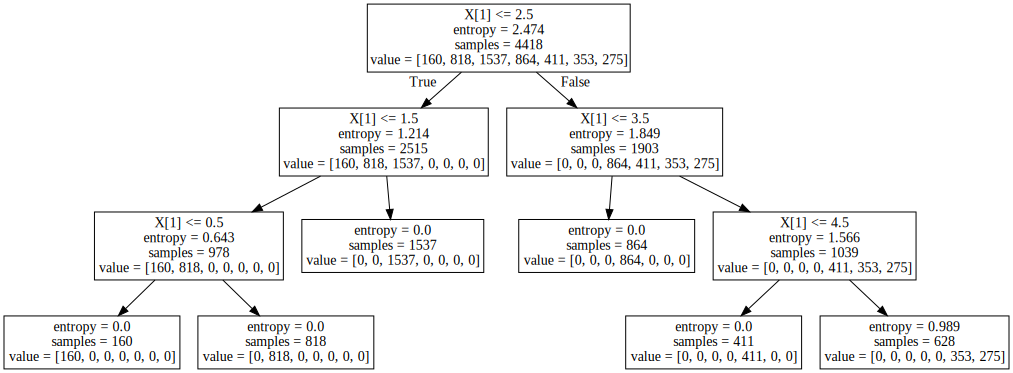

In [32]:
grafo

In [36]:
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(max_depth=3, random_state=0, criterion='gini')
clf2.fit(X=x_train,y=y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [37]:
print("acurácia no treino: {:.3f}".format(clf2.score(x_train,y_train)))
print("acurácia no teste: {:.3f}".format(clf2.score(x_test,y_test)))

acurácia no treino: 0.938
acurácia no teste: 0.934


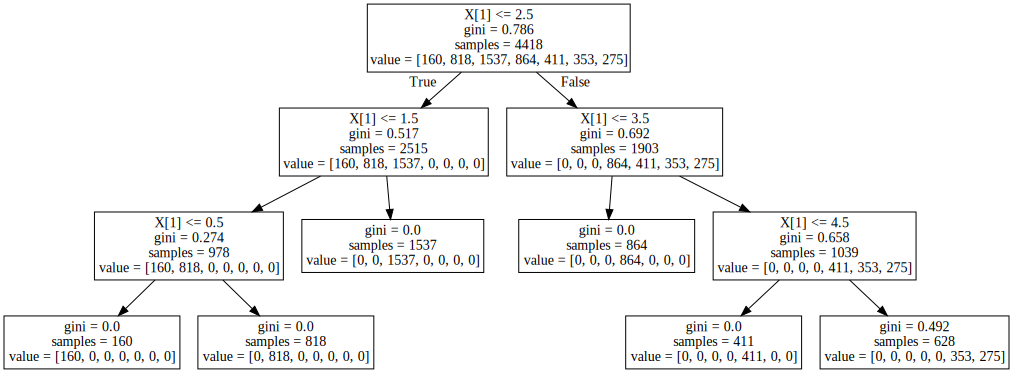

In [39]:
dados = tree.export_graphviz(clf2, out_file=None)
grafo = graphviz.Source(dados)
grafo